In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-sales/bmw.csv


In [18]:
import pandas as pd

df= pd.read_csv('/kaggle/input/bmw-sales/bmw.csv')
print(df.head())

       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


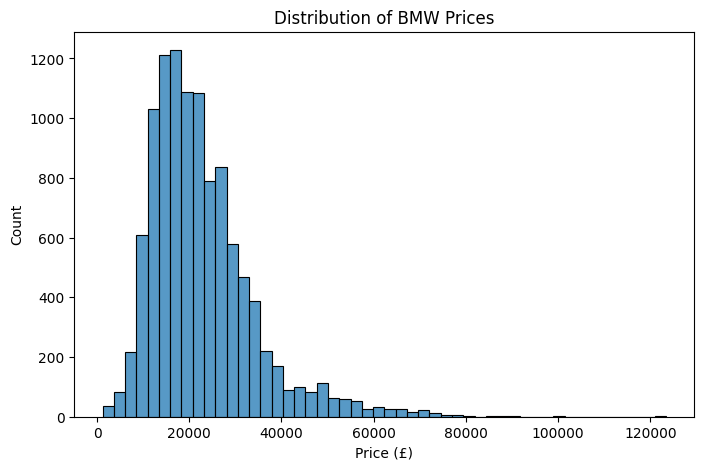

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50,)
plt.title('Distribution of BMW Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()

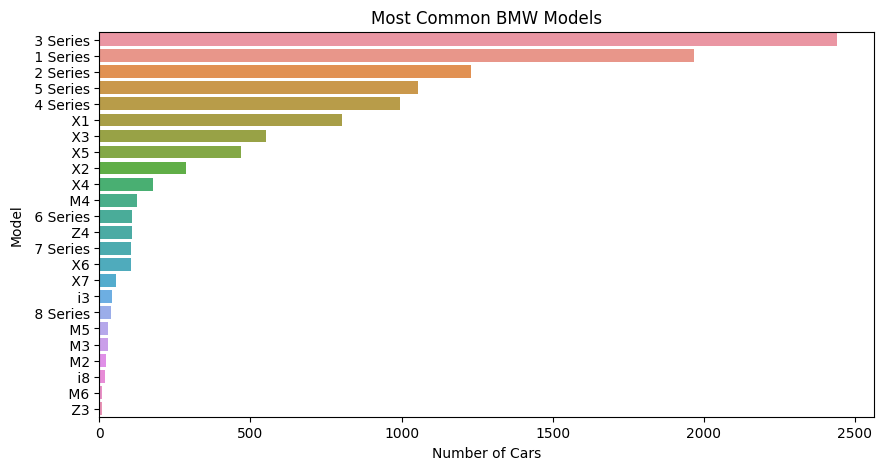

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='model', order=df['model'].value_counts().index)
plt.title('Most Common BMW Models')
plt.xlabel('Number of Cars')
plt.ylabel('Model')
plt.show()


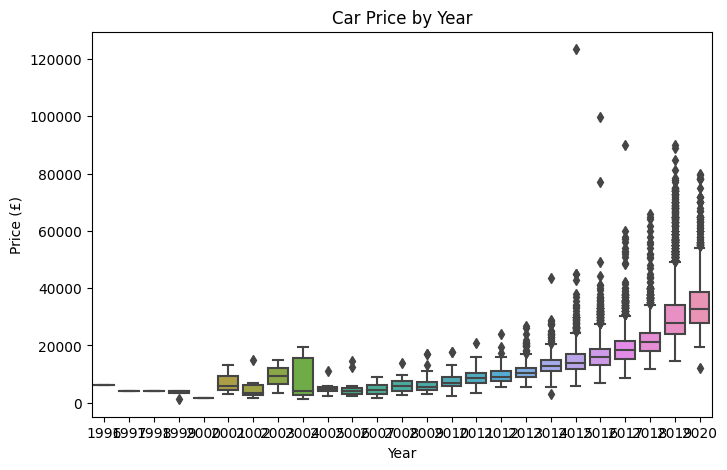

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='year', y='price')
plt.title('Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.show()


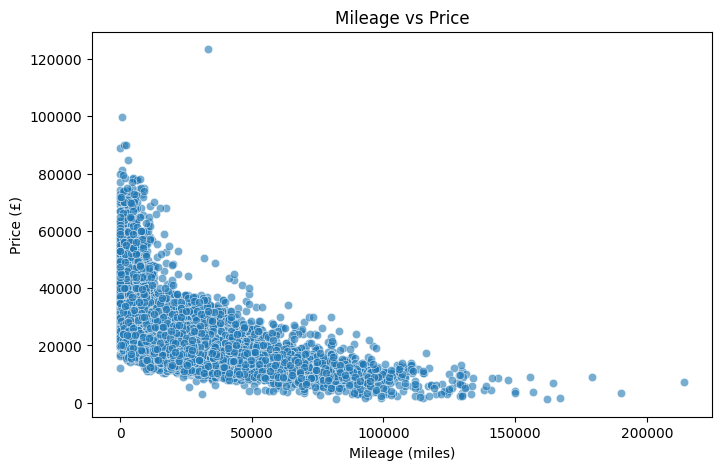

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.6)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')
plt.show()


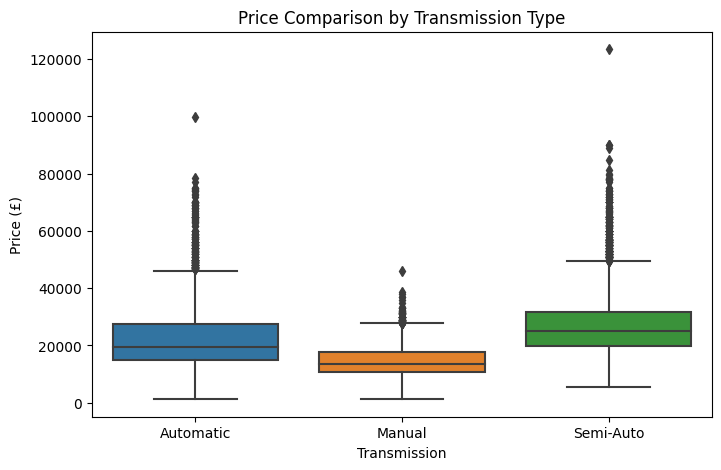

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Comparison by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price (£)')
plt.show()


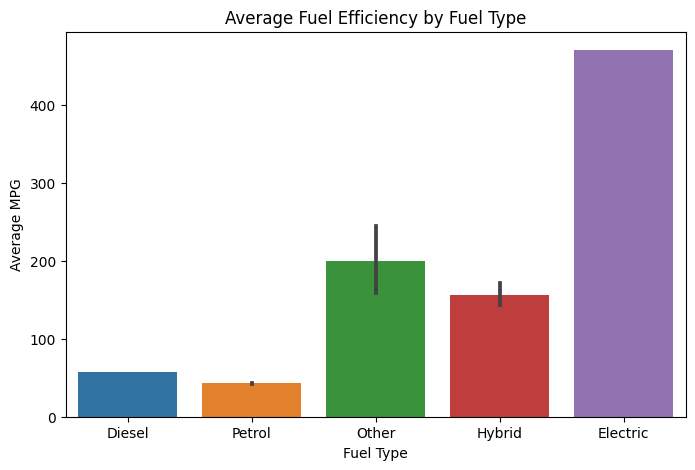

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='fuelType', y='mpg', estimator='mean')
plt.title('Average Fuel Efficiency by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average MPG')
plt.show()


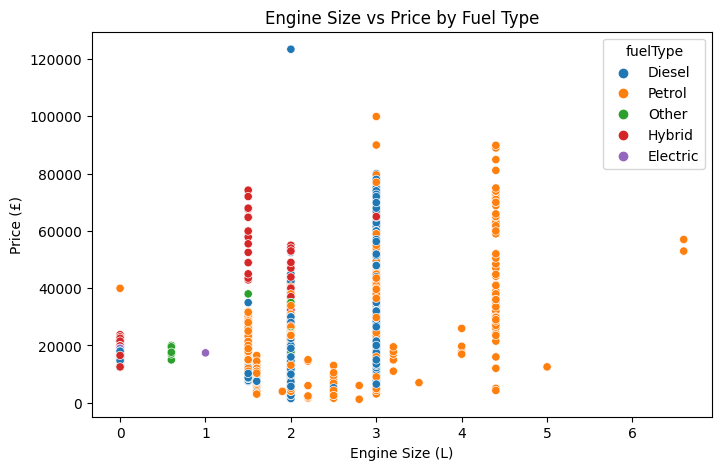

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='engineSize', y='price', hue='fuelType')
plt.title('Engine Size vs Price by Fuel Type')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (£)')
plt.show()


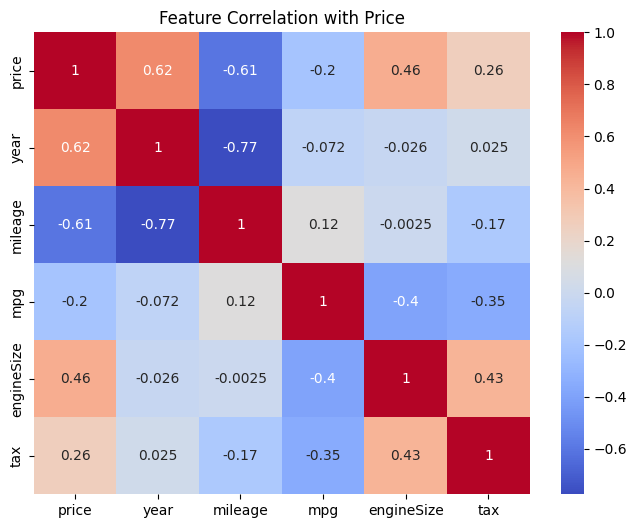

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['price','year','mileage','mpg','engineSize','tax']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


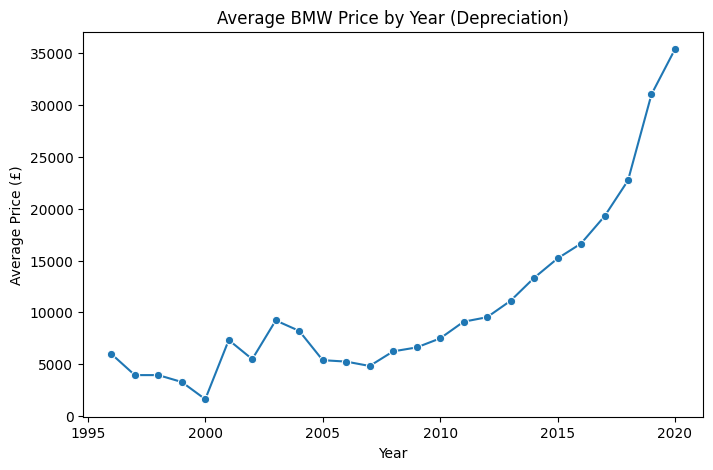

In [34]:
avg_price_per_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_price_per_year, x='year', y='price', marker='o')
plt.title('Average BMW Price by Year (Depreciation)')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.show()


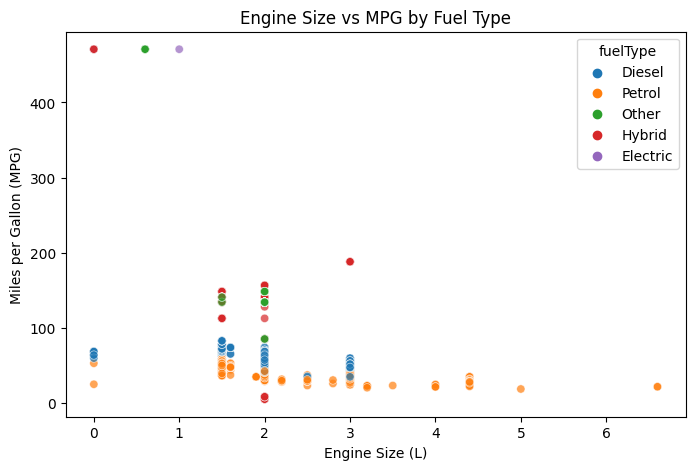

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='engineSize', y='mpg', hue='fuelType', alpha=0.7)
plt.title('Engine Size vs MPG by Fuel Type')
plt.xlabel('Engine Size (L)')
plt.ylabel('Miles per Gallon (MPG)')
plt.show()


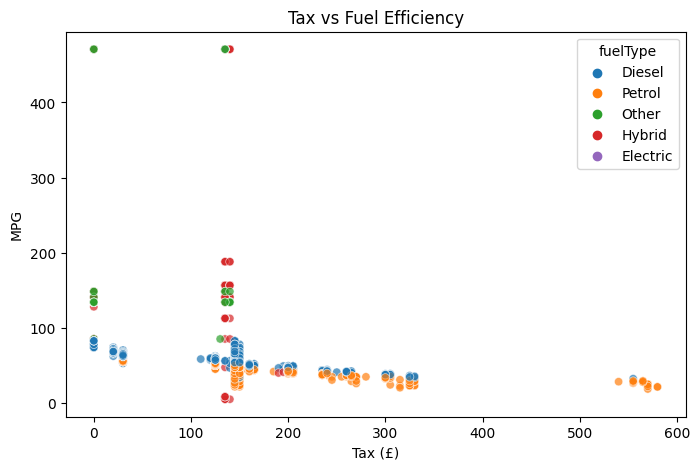

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tax', y='mpg', hue='fuelType', alpha=0.7)
plt.title('Tax vs Fuel Efficiency')
plt.xlabel('Tax (£)')
plt.ylabel('MPG')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


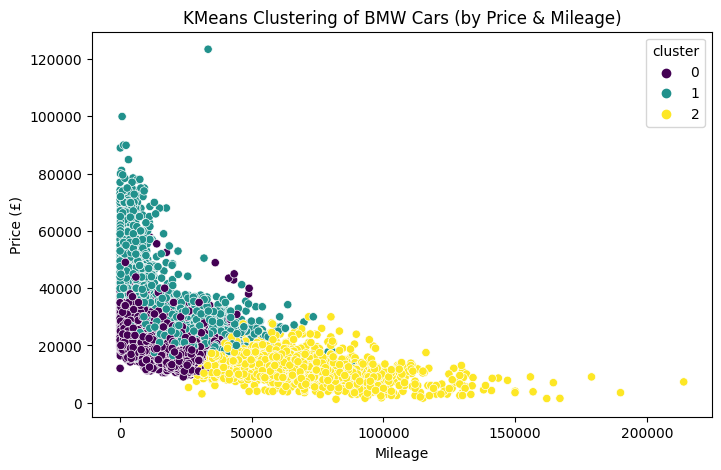

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select numeric columns
features = df[['price', 'mileage', 'engineSize']]

# Scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

# Visualize clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='mileage', y='price', hue='cluster', palette='viridis')
plt.title('KMeans Clustering of BMW Cars (by Price & Mileage)')
plt.xlabel('Mileage')
plt.ylabel('Price (£)')
plt.show()


In [39]:
df.to_csv("bmw_cleaned.csv", index=False)
